# Titanic: Solution 2

Olhar essa implementação depois:
https://www.kaggle.com/code/alerosso/titanic-top-20-espa-ol-italiano-english/notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [16]:
style.use('styles/personalestilo-1.mplstyle')

In [3]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

In [4]:
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
df_train.shape, df_test.shape

((891, 12), (418, 11))

In [7]:
print(df_train.isnull().sum())
print('###################')
print(df_test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
###################
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


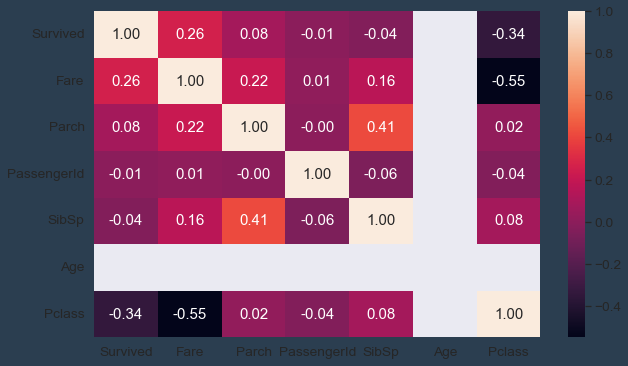

In [8]:
#correlation matrix
corrmat = df_train.corr()
plt.figure(figsize=(10, 6))
k = 12 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Survived')['Survived'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, fmt='.2f', yticklabels=cols.values, xticklabels=cols.values)


<AxesSubplot:>

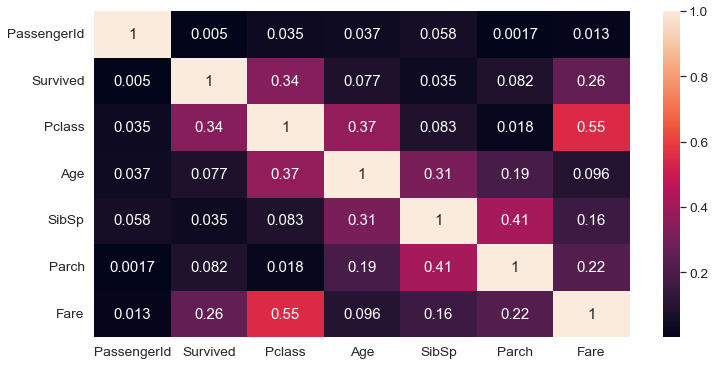

In [9]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_train.corr().abs(),  annot=True)

In [10]:
def bar_chart(coluna):
    sobreviveram = df_train[df_train['Survived']==1][coluna].value_counts()
    morreram = df_train[df_train['Survived']==0][coluna].value_counts()
    df = pd.DataFrame([sobreviveram, morreram])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(6,4))

## Análise exploratória dos dados

#### Atributo: Sex

In [11]:
#Exemplo que eu achei muito interessante de ver a probabilidade de um evento baseado em uma variável
sexProb = df_train.groupby('Sex')['Survived'].transform('sum') / df_train.groupby('Sex')['Survived'].transform('count')
pd.crosstab(sexProb, df_train['Sex'], dropna=False)

Sex,female,male
Survived,,
0.188908,0,577
0.742038,314,0


In [12]:
df_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [13]:
df_test['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [14]:
labels = ['Sobreviveram', 'Morreram']
homensSobreviveram = df_train.loc[(df_train['Sex'] == 'male') & (df_train['Survived'] == 1), 'Sex']
mulheresSobreviveram = df_train.loc[(df_train['Sex'] == 'female') & (df_train['Survived'] == 1), 'Sex']

homensMorreram = df_train.loc[(df_train['Sex'] == 'male') & (df_train['Survived'] == 0), 'Sex']
mulheresMorreram = df_train.loc[(df_train['Sex'] == 'female') & (df_train['Survived'] == 0), 'Sex']

homens = np.array([len(homensSobreviveram), len(homensMorreram)])
mulheres = np.array([len(mulheresSobreviveram), len(mulheresMorreram)])

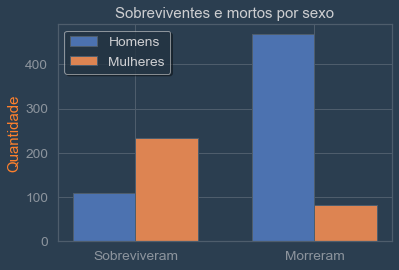

In [17]:
x = np.arange(len(labels))
width= 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, homens, width, label='Homens')
rects2 = ax.bar(x + width/2, mulheres, width, label='Mulheres')

ax.set_ylabel('Quantidade')
ax.set_title('Sobreviventes e mortos por sexo')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

In [18]:
sex_map = {
    'male': 0,
    'female': 1
}

df_train['Sex'] = df_train['Sex'].map(sex_map)
df_test['Sex'] = df_test['Sex'].map(sex_map)

### Atributo: Pclass

In [19]:
df_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [20]:
df_test['Pclass'].value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

In [21]:
df_train['Pclass'].isnull().sum(), df_test['Pclass'].isnull().sum()

(0, 0)

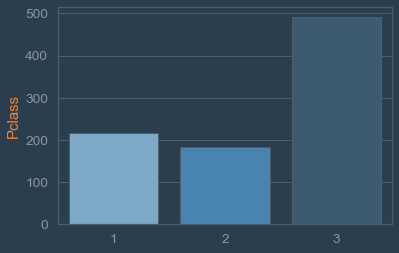

In [22]:
df_Pclass = df_train['Pclass'].value_counts()
ax = sns.barplot(y=df_train['Pclass'].value_counts(), x=df_Pclass.index, data=df_train, palette="Blues_d")

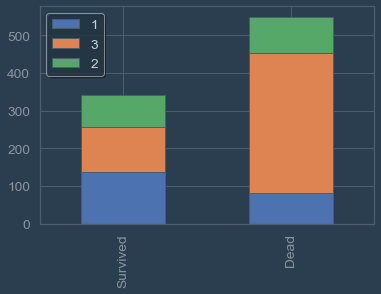

In [23]:
bar_chart('Pclass')

In [24]:
pclassProb = df_train.groupby('Pclass')['Survived'].transform('sum') / df_train.groupby('Pclass')['Survived'].transform('count')
pd.crosstab(pclassProb, df_train['Pclass'], dropna=False)

Pclass,1,2,3
Survived,,,
0.242363,0,0,491
0.472826,0,184,0
0.629630,216,0,0


### Atributo: Name

In [25]:
df_train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [26]:
df_train['Name'].isnull().sum(), df_test['Name'].isnull().sum()

(0, 0)

In [27]:
treino_teste = [df_train, df_test] #Uma lista com o Dataframe de treino e teste.
for df in treino_teste:
    df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.', expand=False)

In [28]:
df_train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [29]:
pd.DataFrame(df_train.groupby(['Title', 'Survived'])['Survived'].count())

Survived
Title    Survived          
Capt     0                1
Col      0                1
         1                1
Countess 1                1
Don      0                1
Dr       0                4
         1                3
Jonkheer 0                1
Lady     1                1
Major    0                1
         1                1
Master   0               17
         1               23
Miss     0               55
         1              127
Mlle     1                2
Mme      1                1
Mr       0              436
         1               81
Mrs      0               26
         1               99
Ms       1                1
Rev      0                6
Sir      1                1

In [30]:
titleProb = df_train.groupby('Title')['Survived'].transform('sum') / df_train.groupby('Title')['Survived'].transform('count')
pd.crosstab(titleProb, df_train['Title'], dropna=False)

Title,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Survived,,,,,,,,,,,,,,,,,
0.000000,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,6,0
0.156673,0,0,0,0,0,0,0,0,0,0,0,0,517,0,0,0,0
0.428571,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0
0.500000,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0
0.575000,0,0,0,0,0,0,0,0,40,0,0,0,0,0,0,0,0
0.697802,0,0,0,0,0,0,0,0,0,182,0,0,0,0,0,0,0
0.792000,0,0,0,0,0,0,0,0,0,0,0,0,0,125,0,0,0
1.000000,0,0,1,0,0,0,1,0,0,0,2,1,0,0,1,0,1


In [31]:
#Vamos mapear da seguinte maneira:
# 0 = 0% de chance de sobreviver;
# 1 = Entre 15% e 50%
# 2 = Entre 57 e 79%
# 3 = 100% de chance de sobreviver;

title_mapping = {
    'Capt': 0, 'Don': 0, 'Jonkheer': 0, 'Rev': 0,
    'Mr': 1, 'Dr': 1, 'Col': 1, 'Major': 1,
    'Master': 2, 'Miss': 2, 'Mrs': 2,
    'Countess': 3, 'Lady': 3, 'Mlle': 3, 'Mme': 3, 'Ms': 3, 'Sir': 3
}

for df in treino_teste:
    df['Title'] = df['Title'].map(title_mapping)

In [32]:
#Preenchendo os valores que ficaram como nulos.
df_train['Title'].fillna(2, inplace=True)
df_test['Title'].fillna(2, inplace=True)

#### Atributo: Age

In [33]:
df_train['Age'].isnull().sum(), df_test['Age'].isnull().sum() 

(177, 86)

In [34]:
df_train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Count'>

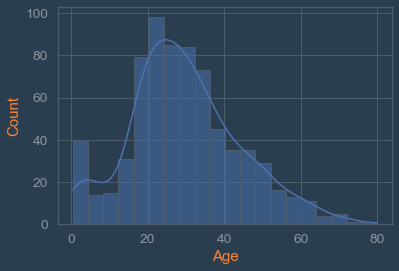

In [35]:
sns.histplot(df_train['Age'], kde = True, bins=20)

In [36]:
df_train['Age'].fillna(df_train.groupby('Title')['Age'].transform('median'), inplace=True)
df_test['Age'].fillna(df_test.groupby('Title')['Age'].transform('median'), inplace=True)

In [37]:
#df_test.Age.isnull().value_counts()
df_test.loc[df_test.Age.isnull(), 'Age'] = 30

In [38]:
list_df = [df_train, df_test]
for df in list_df:
    df['CategoricalAge'] = pd.cut(df['Age'], [0, 18, 40, 100], labels=[0,1,2])

In [39]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,CategoricalAge
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,2,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,2,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1,1


### Atributo: Sibsp and Parch

In [40]:
df_train['SibSp'].isnull().sum(), df_test['SibSp'].isnull().sum()

(0, 0)

In [41]:
df_train['Parch'].isnull().sum(), df_test['Parch'].isnull().sum()

(0, 0)

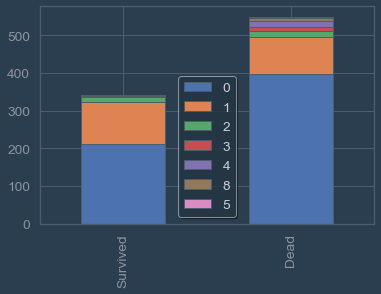

In [42]:
bar_chart('SibSp')

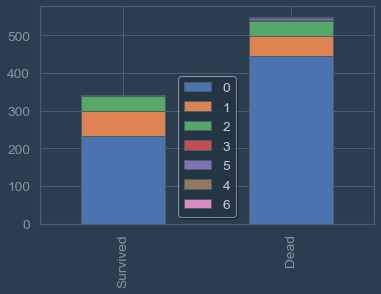

In [43]:
bar_chart('Parch')

In [44]:
df_train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [45]:
df_train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [46]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

### Atributo: Embarked

In [47]:
df_train['Embarked'].isnull().sum(), df_test['Embarked'].isnull().sum()

(2, 0)

In [48]:
df_train['Embarked'].value_counts(), df_test['Embarked'].value_counts()

(S    644
 C    168
 Q     77
 Name: Embarked, dtype: int64,
 S    270
 C    102
 Q     46
 Name: Embarked, dtype: int64)

In [49]:
df_train['Embarked'].mode().values[0]

'S'

In [50]:
#Preenchendo com a moda
df_train['Embarked'].fillna(df_train['Embarked'].mode().values[0], inplace=True)
df_test['Embarked'].fillna(df_train['Embarked'].mode().values[0], inplace=True)

In [51]:
emb_map = {
    'S': 0,
    'C': 1,
    'Q': 2
}

df_train['Embarked'] = df_train['Embarked'].map(emb_map)
df_test['Embarked'] = df_test['Embarked'].map(emb_map)

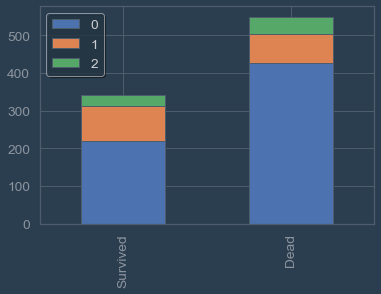

In [52]:
bar_chart('Embarked')

In [53]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,CategoricalAge,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,1,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,2,1,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,2,1,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,1,1,1


### Atributo: Fare

In [54]:
df_train['Fare'].isnull().sum(), df_test['Fare'].isnull().sum()

(0, 1)

In [55]:
df_train['Fare'].fillna(df_train.groupby('Pclass')['Fare'].transform('median'), inplace = True)
df_test['Fare'].fillna(df_test.groupby('Pclass')['Fare'].transform('median'), inplace = True)

#### Atributo: Cabin

In [56]:
df_train['Cabin'] = df_train['Cabin'].str[:1]
df_test['Cabin'] = df_test['Cabin'].str[:1]

In [57]:
df_train['Cabin'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

In [58]:
print(df_train.shape, df_test.shape)

print(df_train['Cabin'].isnull().sum(), df_test['Cabin'].isnull().sum())

(891, 15) (418, 14)
687 327


### Salvando dataset para começar a partir daqui

In [59]:
df_train.to_csv('data/treinoProcessado.csv', index = False)
df_test.to_csv('data/testeProcessado.csv', index = False)

### Pré modelagem dos dados

In [187]:
df_train = pd.read_csv('data/treinoProcessado.csv')
df_test = pd.read_csv('data/testeProcessado.csv')

In [188]:
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,CategoricalAge,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,1,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,1,2,1,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2,1,1


In [189]:
features_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'FamilySize', 'CategoricalAge']
f_train = df_train.drop(features_drop, axis=1)
f_test = df_test.drop(features_drop, axis=1)
f_test['Survived'] = -1

In [190]:
#f_total = f_train.join(f_test)
f_total = pd.concat([f_train, f_test], ignore_index=True)

In [191]:
f_total.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

In [192]:
f_total.shape

(1309, 9)

In [193]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

def encoder(df, col):
    X = df.values
    valores_Pclass = list(df[col].sort_values().unique())
    colunas = []
    for i in valores_Pclass:
        colunas.append(col + '_' + str(i))
    colunas = colunas + list(df.columns)
    
    labelencoder_Pclass = LabelEncoder()
    X[:, 0] = labelencoder_Pclass.fit_transform(X[:, 0])
    
    onehotencoder = OneHotEncoder(handle_unknown='ignore')
    enc_df = onehotencoder.fit_transform(df[[col]]).toarray()
    enc_df = pd.DataFrame(enc_df)
    
    df = enc_df.join(df)
    df.columns = colunas
    df.drop(col, axis=1, inplace=True)
    
    return df

**Pclass**

In [194]:
f_total = encoder(f_total, 'Pclass')

**Embarked**

In [195]:
f_total = encoder(f_total, 'Embarked')

**Title**

In [196]:
f_total = encoder(f_total, 'Title')

**CategoricalAge**

In [ ]:
f_total = encoder(f_total, 'CategoricalAge')

In [96]:
f_total

,Sex_0,Sex_1,Title_0.0,Title_1.0,Title_2.0,Title_3.0,Embarked_0,Embarked_1,Embarked_2,Pclass_1,Pclass_2,Pclass_3,Survived,Age,SibSp,Parch,Fare
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0.273456,0.125,0.000000,0.014151
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,0.473882,0.125,0.000000,0.139136
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1,0.323563,0.000,0.000000,0.015469
3,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,0.436302,0.125,0.000000,0.103644
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0.436302,0.000,0.000000,0.015713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-1,0.361142,0.000,0.000000,0.015713
1305,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-1,0.486409,0.000,0.000000,0.212559
1306,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-1,0.480145,0.000,0.000000,0.014151
1307,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-1,0.361142,0.000,0.000000,0.015713


### Padronização dos dados

In [73]:
f_total.head(3)

,Sex_0,Sex_1,Title_0.0,Title_1.0,Title_2.0,Title_3.0,Embarked_0,Embarked_1,Embarked_2,Pclass_1,Pclass_2,Pclass_3,Survived,Age,SibSp,Parch,Fare
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,22.0,1,0,7.2500
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,38.0,1,0,71.2833
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1,26.0,0,0,7.9250


In [197]:
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

In [198]:
X_quantile = f_total.copy()
X_quantile[['Fare', 'Age', 'SibSp', 'Parch']] = QuantileTransformer().fit_transform(f_total[['Fare', 'Age', 'SibSp', 'Parch']])

In [199]:
X_MinMaxScaler = f_total.copy()
X_MinMaxScaler[['Fare', 'Age', 'SibSp', 'Parch']] = MinMaxScaler().fit_transform(f_total[['Fare', 'Age', 'SibSp', 'Parch']])

In [200]:
X_MinMaxScaler.head()

,Title_0.0,Title_1.0,Title_2.0,Title_3.0,Embarked_0,Embarked_1,Embarked_2,Pclass_1,Pclass_2,Pclass_3,Survived,Sex,Age,SibSp,Parch,Fare
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,0.273456,0.125,0.0,0.014151
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,1,0.473882,0.125,0.0,0.139136
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1,1,0.323563,0.000,0.0,0.015469
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,1,0.436302,0.125,0.0,0.103644
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,0.436302,0.000,0.0,0.015713


In [201]:
f_total = X_MinMaxScaler

### Separando os dados padronizados de volta

In [233]:
f_train = f_total[0:f_train.shape[0]].copy()
f_test = f_total[f_train.shape[0]:].copy()
f_test.drop(['Survived'], axis=1, inplace=True)

In [234]:
f_total.head()

,Title_0.0,Title_1.0,Title_2.0,Title_3.0,Embarked_0,Embarked_1,Embarked_2,Pclass_1,Pclass_2,Pclass_3,Survived,Sex,Age,SibSp,Parch,Fare
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,0.273456,0.125,0.0,0.014151
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,1,0.473882,0.125,0.0,0.139136
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1,1,0.323563,0.000,0.0,0.015469
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,1,0.436302,0.125,0.0,0.103644
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,0.436302,0.000,0.0,0.015713


### Removendo atributos menos relevantes

In [235]:
colunas = ['Title_3.0', 'Embarked_2', 'Pclass_2']
f_train = f_train.drop(colunas, axis=1)
f_test = f_test.drop(colunas, axis=1)

In [236]:
f_train.head()

,Title_0.0,Title_1.0,Title_2.0,Embarked_0,Embarked_1,Pclass_1,Pclass_3,Survived,Sex,Age,SibSp,Parch,Fare
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0,0,0.273456,0.125,0.0,0.014151
1,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1,1,0.473882,0.125,0.0,0.139136
2,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1,1,0.323563,0.000,0.0,0.015469
3,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1,1,0.436302,0.125,0.0,0.103644
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0,0,0.436302,0.000,0.0,0.015713


### Modelagem

In [237]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from time import time

In [238]:
X = f_train.drop('Survived', axis=1).values
Y = f_train['Survived'].values

**Cross Validation (K-Fold)**

In [239]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=15, shuffle=True, random_state=0)

#### **KNN**

In [240]:
#Criando o modelo KNN
KNN = KNeighborsClassifier(n_neighbors = 8, p=1)

In [241]:
#Utilizando o Cross Validation
scoring = 'accuracy'
score = cross_val_score(KNN, X, Y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.8        0.85       0.81666667 0.78333333 0.86666667 0.83333333
 0.86440678 0.93220339 0.76271186 0.86440678 0.72881356 0.84745763
 0.74576271 0.84745763 0.77966102]


In [242]:
round(np.mean(score)*100, 2)

82.15

**KNN Ensemble com Bagging Classifier**

In [246]:
bagging = BaggingClassifier(KNeighborsClassifier(), max_samples = 0.5, max_features = 0.5)

#Utilizando o Cross Validation
scoring = 'accuracy'
score = cross_val_score(bagging, X, Y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

print(round(np.mean(score)*100, 2))

[0.83333333 0.78333333 0.81666667 0.8        0.83333333 0.76666667
 0.86440678 0.86440678 0.77966102 0.89830508 0.77966102 0.84745763
 0.77966102 0.84745763 0.74576271]
81.6


**KNN Ensemble com Ada Boost**

In [247]:
ada_clf = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 1, min_samples_leaf = 1),
                             learning_rate = 1.1,
                             n_estimators = 400,
                             algorithm = "SAMME")

#Utilizando o Cross Validation
scoring = 'accuracy'
score = cross_val_score(ada_clf, X, Y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

print(round(np.mean(score)*100, 2))

[0.86666667 0.81666667 0.75       0.81666667 0.78333333 0.78333333
 0.81355932 0.84745763 0.76271186 0.83050847 0.79661017 0.83050847
 0.79661017 0.91525424 0.81355932]
81.49


**KNN Avançado**

In [248]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split (X, Y, test_size = 0.33, random_state = 101)

# Função para testar o melhor valor de K
def compute_teste (x_teste, y_teste, clf, cv):
    k_fold = KFold(n_splits=15, shuffle=True)
    
    scores = []
    
    for i, j in k_fold.split(x_teste):
        test_set = x_teste[j]
        test_labels = y_teste[j]
        scores.append(accuracy_score(test_labels, clf.predict(test_set)))
    return scores

In [249]:
#Normalização dos dados pela Média

# Cálculo da média do dataset de treino
X_norm = np.mean(X_treino, axis = 0)

# Normalização dos dados de treino e de teste
X_treino_norm = X_treino - X_norm
X_teste_norm = X_teste - X_norm

In [250]:
# Shape dos datasets
print(X_treino_norm.shape, X_teste_norm.shape, Y_treino.shape, Y_teste.shape)

(596, 12) (295, 12) (596,) (295,)


In [251]:
# Construção do Modelo KNN
# http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
modelo = KNeighborsClassifier()

In [252]:
# Definição de parâmetros
k = np.arange(20) + 1
parametros = {'n_neighbors':k}

In [253]:
# Grid Search para Cross Validation com o melhor valor de K
modeloKNN = GridSearchCV(KNN, parametros, cv = 10)

In [254]:
modeloKNN.get_params()

{'cv': 10,
 'error_score': nan,
 'estimator__algorithm': 'auto',
 'estimator__leaf_size': 30,
 'estimator__metric': 'minkowski',
 'estimator__metric_params': None,
 'estimator__n_jobs': None,
 'estimator__n_neighbors': 8,
 'estimator__p': 1,
 'estimator__weights': 'uniform',
 'estimator': KNeighborsClassifier(n_neighbors=8, p=1),
 'n_jobs': None,
 'param_grid': {'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 20])},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [255]:
# Lista de dimensões
dimensoes = np.arange(X_treino.shape[1] - 1) + 1

In [256]:
# Listas vazias que vão receber os scrores de acurária e os parâmetros resultados do modelo
acuracia = []
params = []

In [257]:
# Implementação do modelo
for d in dimensoes:
    svd = TruncatedSVD(n_components = d) #Instânciando a classe de redução de dimensionalidade
    
    X_fit_treino = svd.fit_transform(X_treino) #Aplicando a redução de dimensionalidade no conjunto de treino
    X_fit_teste = svd.transform(X_teste) #Aplicando a redução de dimensionalidade no conjunto de teste
        
    modeloKNN.fit(X_fit_treino, Y_treino) #Treinando o modelo
    
    acuracia.append(compute_teste(x_teste = X_fit_teste, y_teste = Y_teste, clf = modeloKNN, cv = 8))
    params.append(modeloKNN.best_params_['n_neighbors'])

In [258]:
params

[5, 12, 20, 20, 20, 16, 18, 20, 20, 18, 20]

In [259]:
for cv in acuracia:
    print(round(np.mean(cv)*100, 2))

70.25
80.3
80.23
80.25
79.93
79.96
81.32
80.68
80.4
80.37
80.0


#### **Decision Tree**

In [260]:
Decision_Tree = DecisionTreeClassifier(max_depth = 4, #Profundidade da árvore, é um critério de parada
                                       max_features = None, #Quantos atributo iremos utilizar na construção do modelo
                                       criterion = 'entropy', #entropy ou gini
                                       splitter = 'best',
                                       min_samples_leaf = 1, #Número mínimo de amostras para o node leaf (terminal)
                                       min_samples_split = 4)
scoring = 'accuracy'
score = cross_val_score(Decision_Tree, X, Y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.8        0.83333333 0.76666667 0.83333333 0.83333333 0.83333333
 0.84745763 0.88135593 0.71186441 0.88135593 0.72881356 0.84745763
 0.79661017 0.89830508 0.86440678]


In [261]:
round(np.mean(score)*100, 2)

82.38

#### **Random Forest**

Os 4 principais parâmetros em Modelos de Random Forest são:

n_estimators - quanto maior, melhor!

max depth - o padrão é 'none' e nesse caso árvores completas são criadas. Ajustando esse parâmetro pode ajudar a evitar overfitting.

max_features - diferentes valores devem ser testados, pois este parâmetro impacta na forma como os modelos RF distribuem os atributos pelas árvores.

criterion - define a forma como o algoritmo fará a divisão dos atributos e a classificação dos nós em cada árvore.

In [262]:
RandomForest = RandomForestClassifier(n_estimators=20, 
                                      bootstrap=True, 
                                      criterion='entropy', 
                                      min_samples_leaf=1, 
                                      min_samples_split=18, 
                                      random_state=8)
scoring = 'accuracy'
score = cross_val_score(RandomForest, X, Y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.81666667 0.85       0.81666667 0.81666667 0.85       0.88333333
 0.89830508 0.86440678 0.81355932 0.84745763 0.77966102 0.84745763
 0.79661017 0.88135593 0.83050847]


In [263]:
round(np.mean(score)*100, 2)

83.95

In [215]:
# Extraindo a importância
RandomForest.fit(X, Y)
importances = RandomForest.feature_importances_
indices = np.argsort(importances)

In [216]:
# Obtém os índices
ind=[]
for i in indices:
    ind.append(f_train.columns[i])

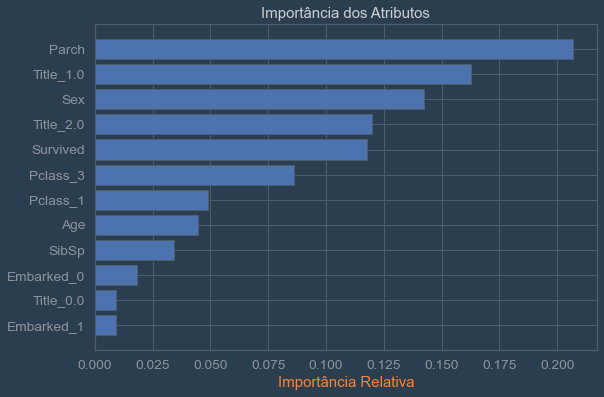

In [217]:
# Plot da Importância dos Atributos
plt.figure(figsize=(9,6))
plt.title('Importância dos Atributos')
plt.barh(range(len(indices)), importances[indices], color = 'b', align = 'center')
plt.yticks(range(len(indices)),ind)
plt.xlabel('Importância Relativa')
plt.show()

In [218]:
# Obtém as instâncias (exemplos ou observações) e retorna as probabilidades da coluna ser relevante para a previsão
#instance = X[0]
#print(RandomForest.predict_proba(instance.reshape(1, -1)))

#### **Extra Trees**

In [ ]:
ExtraTrees = ExtraTreesClassifier(n_estimators = 5, max_depth = None, min_samples_split = 2, random_state = 0)
scoring = 'accuracy'
scores = cross_val_score(ExtraTrees, X, Y, cv=k_fold, n_jobs=1, scoring=scoring)
print(scores)

In [ ]:
round(np.mean(scores)*100, 2)

In [ ]:
# Extraindo a importância
ExtraTrees.fit(X_treino, Y_treino)
importances = ExtraTrees.feature_importances_
indices = np.argsort(importances)

# Obtém os índices
ind=[]
for i in indices:
    ind.append(f_total.columns[i])
    
# Plot da Importância dos Atributos
plt.figure(figsize=(9,6))
plt.title('Importância dos Atributos')
plt.barh(range(len(indices)), importances[indices], color = 'b', align = 'center')
plt.yticks(range(len(indices)),ind)
plt.xlabel('Importância Relativa')
plt.show()

#### **RandomizedSearchCV e GridSearchCV**

**RandomizedSearchCV para testar diferentes combinações de parâmetros**<br/>
O randomized testa apenas uma porção dos parâmetros de forma aleatória e nos da o melhor resultado dentre as combinações.

In [ ]:
# Definição dos parâmetros
param_dist = {"max_depth": [1, 3, 7, 8, 12, None],
              "max_features": [11, 13, 15, 17, 19],
              "min_samples_split": [8, 10, 11, 14, 16, 19],
              "min_samples_leaf": [1, 2, 3, 4, 5, 6, 7],
              "bootstrap": [True, False]}

In [ ]:
# Para o classificador criado na célula anterior, testamos diferentes combinações de parâmetros
rsearch = RandomizedSearchCV(ExtraTrees, param_distributions = param_dist, n_iter = 25)  

In [ ]:
# Aplicando o resultado ao conjunto de dados de treino e obtendo o score
rsearch.fit(X, Y)
rsearch.cv_results_

In [ ]:
# Imprimindo o melhor estimador
bestclf = rsearch.best_estimator_
print (bestclf)

In [ ]:
scores = cross_val_score(bestclf, X, Y, cv=k_fold, n_jobs=1, scoring=scoring)
print(scores)

In [ ]:
round(np.mean(score)*100, 2)

**GridSearchCV**<br/>
O Grid Search realiza metodicamente combinações entre todos os parâmetros do algoritmo, criando um grid. 

In [ ]:
# Valores dos parâmetros que serão testados
param_grid = {"max_depth": [None],
              "max_features": [1, 2, 4, 6, 7],
              "min_samples_leaf": [2, 4, 8, 10],
              "bootstrap": [True, False],
              "criterion": ["entropy", "gini"]}

In [ ]:
# Executando o Randomized Search
grid_search = GridSearchCV(ExtraTrees, param_grid = param_grid)

In [ ]:
start = time()
scores = cross_val_score(grid_search, X, Y, cv=k_fold, n_jobs=1, scoring=scoring)
print(scores)
print("GridSearch executou em %.2f segundos." 
      % ((time() - start)))

In [ ]:
round(np.mean(scores)*100, 2)

In [ ]:
grid_search.fit(X, Y)

In [ ]:
# Imprimindo o melhor estimador
bestclf = grid_search.best_estimator_
print (bestclf)

In [ ]:
round(np.mean(scores)*100, 2)

#### **Gradiente Boosting**


Gradient Boosting ou Gradient Boostted Regression Trees (GBRT) é uma técnica de aprendizagem estatística não-paramétrica usada para problemas de classificação e regressão. Gradient Boosting = Gradient Descent + Boosting. Basicamente 3 etapas são realizadas na construção do modelo:
- Realiza um conjunto de previsões (y)
- Calcula o erro das previsões (j)
- Tenta ajustar y reduzindo o erro (através de alpha)
- Para cada estimador base, é estimado o gradiente da função de perda
- Estimadores subsequentes estimam o erro residual dos estimadores anteriores
- Aplica o Gradient Descent para reduzir j
- Soma os resultados dos estimadores, dando peso a cada passo de acordo com o valor de alfa

_Parâmetros mais importantes:_
- Número de árvores de regressão (n_estimators)
- Profundidade de cara árvore (max_depth)
- loss function (loss)

In [122]:
from sklearn.ensemble import GradientBoostingClassifier

In [123]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split (X, Y, test_size = 0.33)
GradientBoosting = GradientBoostingClassifier(n_estimators = 500, 
                                              learning_rate = 1.2, 
                                              max_depth = 1, 
                                              min_samples_leaf = 3)

In [124]:
scoring = 'accuracy'
score = cross_val_score(GradientBoosting, X_treino, Y_treino, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.825      0.825      0.8        0.775      0.75       0.775
 0.775      0.8        0.725      0.725      0.825      0.84615385
 0.79487179 0.79487179 0.82051282]


In [125]:
round(np.mean(score)*100, 2)

79.04

In [127]:
GradientBoosting.fit(X_treino, Y_treino)
GradientBoosting.score(X_teste, Y_teste)

0.8271186440677966

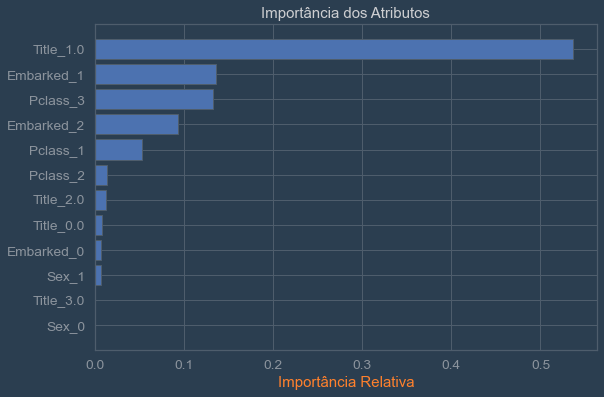

In [128]:
# Extraindo a importância
GradientBoosting.fit(X_treino, Y_treino)
importances = GradientBoosting.feature_importances_
indices = np.argsort(importances)

# Obtém os índices
ind=[]
for i in indices:
    ind.append(f_total.columns[i])
    
# Plot da Importância dos Atributos
plt.figure(figsize=(9,6))
plt.title('Importância dos Atributos')
plt.barh(range(len(indices)), importances[indices], color = 'b', align = 'center')
plt.yticks(range(len(indices)),ind)
plt.xlabel('Importância Relativa')
plt.show()

_Utilizando GridSearchCV_

In [ ]:
# Valores dos parâmetros que serão testados
param_grid = {"learning_rate": [0.2, 0.6, 1, 1.2],
              "max_depth": [1, 2, 3],
              "min_samples_leaf": [3, 5]
             }

# Executando o Randomized Search
grid_search = GridSearchCV(GradientBoosting, param_grid = param_grid)

start = time()
scores = cross_val_score(grid_search, X_treino, Y_treino, cv=k_fold, n_jobs=1, scoring=scoring)
print(scores)
print("GridSearch executou em %.2f segundos." 
      % ((time() - start)))

gs_cv = grid_search.fit(X_treino, Y_treino)
gs_cv.score(X_teste, Y_teste)

In [ ]:
# Imprime os melhors parâmetros
print('Melhores Hyperparametros: %r' % gs_cv.best_params_)

#### **Naive Bayes**

In [130]:
from sklearn.metrics import confusion_matrix, classification_report

In [131]:
NaiveBayes = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(NaiveBayes, X, Y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.45       0.53333333 0.3        0.38333333 0.36666667 0.43333333
 0.30508475 0.38983051 0.30508475 0.40677966 0.50847458 0.33898305
 0.45762712 0.44067797 0.52542373]


In [132]:
round(np.mean(score)*100, 2)

40.96

In [133]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split (X, Y, test_size = 0.33)

In [134]:
#Classificador
modelo = NaiveBayes.fit(X_treino, Y_treino)

#previsto
previsto = modelo.predict(X_teste)

#Sumário
print(confusion_matrix(Y_teste, previsto))
print(classification_report(Y_teste, previsto))

[[  5 174]
 [  0 116]]
              precision    recall  f1-score   support

           0       1.00      0.03      0.05       179
           1       0.40      1.00      0.57       116

    accuracy                           0.41       295
   macro avg       0.70      0.51      0.31       295
weighted avg       0.76      0.41      0.26       295



**Naive Bayes Bernoulli**

In [ ]:
from sklearn.naive_bayes import BernoulliNB

In [ ]:
Bernoulli = BernoulliNB()
scoring = 'accuracy'
score = cross_val_score(Bernoulli, X, Y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

In [ ]:
round(np.mean(score)*100, 2)

#### **SVM**

In [219]:
SVM = SVC(kernel = 'rbf', C = 1.0, gamma = 0.7)
scoring = 'accuracy'
score = cross_val_score(SVM, X, Y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.83333333 0.81666667 0.81666667 0.8        0.83333333 0.81666667
 0.89830508 0.89830508 0.83050847 0.88135593 0.72881356 0.83050847
 0.76271186 0.89830508 0.77966102]


In [220]:
round(np.mean(score)*100,2)

82.83

#### **Logistic Regression**

In [ ]:
#Possíveis parâmetros: 
#    LogisticRegression(C=109.85411419875572, class_weight=None, dual=False,
#          fit_intercept=True, intercept_scaling=1, max_iter=100,
#          multi_class='warn', n_jobs=None, penalty='l1', random_state=None,
#          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [221]:
logistic_regression = LogisticRegression()
scoring = 'accuracy'
score = cross_val_score(logistic_regression, X, Y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.81666667 0.78333333 0.76666667 0.8        0.8        0.81666667
 0.81355932 0.86440678 0.77966102 0.86440678 0.77966102 0.86440678
 0.77966102 0.89830508 0.86440678]


In [222]:
round(np.mean(score)*100,2)

81.95

#### **Pipeline**

In [223]:
model = logistic_regression

In [224]:
std_slc = StandardScaler() #Normalização dos dados
pca = PCA() #Redução de dimensionalidade
#svd = TruncatedSVD(n_components = 2) #Redução de dimensionalidade
pipe = Pipeline(steps=[('std_slc', std_slc),
                       ('pca', pca),
                       ('logistic_Reg', model)])

In [225]:
scoring = 'accuracy'
score = cross_val_score(pipe, X, Y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.81666667 0.83333333 0.76666667 0.81666667 0.8        0.83333333
 0.83050847 0.86440678 0.79661017 0.86440678 0.83050847 0.86440678
 0.74576271 0.89830508 0.88135593]


In [226]:
round(np.mean(score)*100,2)

82.95

#### **Multi Layer Perceptron (MLP)**

In [145]:
import warnings
warnings.filterwarnings('ignore')

In [146]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [147]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [148]:
qtdCamadas = X_train.shape[1]
MLP = MLPClassifier(
                    hidden_layer_sizes = (qtdCamadas, qtdCamadas, qtdCamadas),
                    activation='identity',
                    alpha=1, 
                    learning_rate='adaptive', 
                    max_iter = 1000
                    )

In [149]:
MLP.fit(X_train, Y_train)

#previsto
previsto = MLP.predict(X_test)

#Sumário
print(confusion_matrix(Y_test, previsto))
#print(classification_report(Y_test, previsto))

[[129  20]
 [ 24  50]]


In [151]:
scoring = 'accuracy'
score = cross_val_score(MLP, X, Y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100,2)

[0.81666667 0.76666667 0.76666667 0.8        0.78333333 0.78333333
 0.83050847 0.88135593 0.77966102 0.84745763 0.77966102 0.86440678
 0.76271186 0.89830508 0.84745763]


81.39

### Testando

In [264]:
modelo = RandomForestClassifier(n_estimators=20, 
                                      bootstrap=True, 
                                      criterion='entropy', 
                                      min_samples_leaf=1, 
                                      min_samples_split=18, 
                                      random_state=8)

In [265]:
modelo.fit(X, Y)

RandomForestClassifier(criterion='entropy', min_samples_split=18,
                       n_estimators=20, random_state=8)

In [266]:
list_ids = df_test['PassengerId']

In [267]:
prediction = modelo.predict(f_test)

In [268]:
submission = pd.DataFrame({
        "PassengerId": list_ids,
        "Survived": prediction
    })

In [269]:
submission.to_csv('submissionV5.csv', index=False)

In [270]:
submission = pd.read_csv('submissionV5.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


### Utilizando o Tensorflow 2

In [271]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision
from tensorflow.keras.metrics import Recall
from sklearn.model_selection import train_test_split

In [272]:
# We split the training data into two samples, training and validation
X_train, X_valid, y_train, y_valid = train_test_split(X, Y)

In [273]:
model = tf.keras.models.Sequential()

In [274]:
X_train.shape

(668, 12)

In [275]:
model.add(tf.keras.Input(shape=(X_train.shape[1])))
model.add(tf.keras.layers.Dense(units=X_train.shape[1], activation='relu', input_shape=(9, )))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=10, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=9, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=2, activation='softmax')) 

In [276]:
# Hyperparameters
autotune = tf.data.experimental.AUTOTUNE
batch_size = 8
epochs = 200
lr = 0.01
beta1 = 0.9
beta2 = 0.9
ep = 1e-08

In [277]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                156       
                                                                 
 dropout (Dropout)           (None, 12)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                130       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_2 (Dense)             (None, 9)                 99        
                                                                 
 dropout_2 (Dropout)         (None, 9)                 0         
                                                                 
 dense_3 (Dense)             (None, 2)                 2

In [278]:
# Model compilation
model.compile(optimizer = Adam(learning_rate = lr, 
                                beta_1 = beta1, 
                                beta_2 = beta2, 
                                epsilon = ep),
               loss = 'sparse_categorical_crossentropy', 
               metrics=['sparse_categorical_accuracy'])

In [279]:
checkpoint1 = tf.keras.callbacks.ModelCheckpoint("best_model.h5", 
                                                verbose = 1, 
                                                save_best_only = True, 
                                                save_weights_only = True)

In [280]:
# Early stop
early_stop = tf.keras.callbacks.EarlyStopping(patience = 50) 

In [281]:
history = model.fit(X, Y, steps_per_epoch = len(X)//batch_size, epochs = epochs, 
                    callbacks = [checkpoint1, early_stop])

Epoch 1/200
111/111 [==============================] - 3s 7ms/step - loss: 0.5914 - sparse_categorical_accuracy: 0.6827
Epoch 2/200
111/111 [==============================] - 1s 5ms/step - loss: 0.4781 - sparse_categorical_accuracy: 0.7918
Epoch 3/200
111/111 [==============================] - 1s 5ms/step - loss: 0.4626 - sparse_categorical_accuracy: 0.8048
Epoch 4/200
111/111 [==============================] - 1s 6ms/step - loss: 0.4645 - sparse_categorical_accuracy: 0.8118
Epoch 5/200
111/111 [==============================] - 1s 6ms/step - loss: 0.4401 - sparse_categorical_accuracy: 0.8208
Epoch 6/200
111/111 [==============================] - 1s 5ms/step - loss: 0.4614 - sparse_categorical_accuracy: 0.8088
Epoch 7/200
111/111 [==============================] - 1s 5ms/step - loss: 0.4406 - sparse_categorical_accuracy: 0.8038
Epoch 8/200
111/111 [==============================] - 1s 5ms/step - loss: 0.4658 - sparse_categorical_accuracy: 0.8078
Epoch 9/200
111/111 [===================

In [282]:
results = model.evaluate(X, Y, batch_size=128)

7/7 [==============================] - 0s 4ms/step - loss: 0.4049 - sparse_categorical_accuracy: 0.8227


In [283]:
previsoes = model.predict(f_test)
pred = np.argmax(previsoes, axis = 1)

In [284]:
submission = pd.DataFrame({
        "PassengerId": df_test['PassengerId'],
        "Survived": pred
    })
submission.to_csv('submissionTensorflow.csv', index=False)